In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [65]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [66]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Papaya_Dataset/train'
valid_path = '/content/drive/MyDrive/Papaya_Dataset/test'


In [67]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [68]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [69]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Papaya_Dataset/train/*')

In [70]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [71]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [72]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [73]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [74]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Papaya_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 173 images belonging to 5 classes.


In [76]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Papaya_Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 41 images belonging to 5 classes.


/content/drive/MyDrive/Papaya_Dataset/train/powdery_mildew/m4.jpg


<ipython-input-77-90a33c15a2f5>:4: DeprecationWarning: This function is deprecated. Please call randint(0, 173 + 1) instead
  img = training_set.filepaths[np.random.random_integers(low=0,high=training_set.samples)]


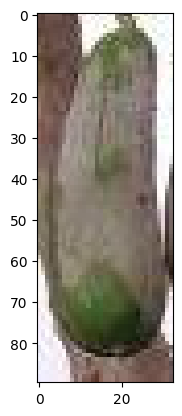

In [77]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

img = training_set.filepaths[np.random.random_integers(low=0,high=training_set.samples)]
# img = '/content/drive/MyDrive/Papaya_Dataset/train/anthracnose/a1.jpg'
print(img)
img = mpimg.imread(img)
plt.imshow(img)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-78-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
6/6 [==============================] - 60s 9s/step - loss: 23.7252 - accuracy: 0.2312 - val_loss: 15.8504 - val_accuracy: 0.1951
Epoch 2/20
6/6 [==============================] - 33s 6s/step - loss: 12.1841 - accuracy: 0.3988 - val_loss: 9.0285 - val_accuracy: 0.4146
Epoch 3/20
6/6 [==============================] - 33s 6s/step - loss: 5.9442 - accuracy: 0.5723 - val_loss: 5.0984 - val_accuracy: 0.4878
Epoch 4/20
6/6 [==============================] - 36s 6s/step - loss: 1.9197 - accuracy: 0.7803 - val_loss: 5.1008 - val_accuracy: 0.7073
Epoch 5/20
6/6 [==============================] - 36s 6s/step - loss: 1.0464 - accuracy: 0.8728 - val_loss: 4.2327 - val_accuracy: 0.6341
Epoch 6/20
6/6 [==============================] - 33s 6s/step - loss: 0.7961 - accuracy: 0.8960 - val_loss: 3.7502 - val_accuracy: 0.6585
Epoch 7/20
6/6 [==============================] - 29s 5s/step - loss: 0.4025 - accuracy: 0.9191 - val_loss: 3.7655 - val_accuracy: 0.7073
Epoch 8/20
6/6 [===============

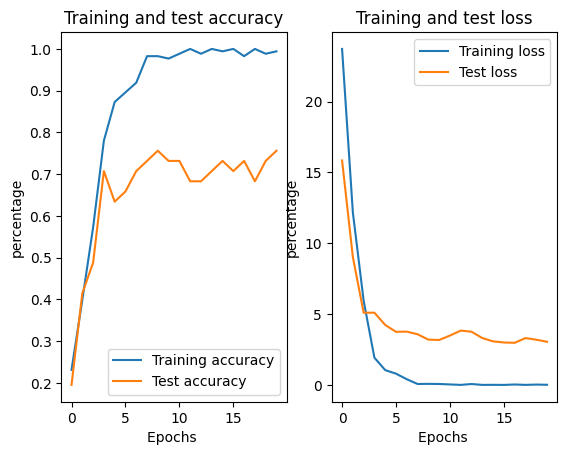

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(r.epoch, r.history['accuracy'], label='Training accuracy')
plt.plot(r.epoch, r.history['val_accuracy'], label='Test accuracy')
plt.xlabel("Epochs ") 
plt.ylabel("percentage")
plt.legend()

plt.subplot(1, 2, 2) 
plt.title('Training and test loss')
plt.plot(r.epoch, r.history['loss'], label='Training loss')
plt.plot(r.epoch, r.history['val_loss'], label='Test loss') 
plt.xlabel("Epochs ")
plt.ylabel("percentage")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

test_set.reset()
predictions = model.predict_generator(test_set, steps=len(test_set)) 
y= np.argmax(predictions, axis=1)

print('Classification Report')
cr = classification_report(y_true=test_set.classes, y_pred=y, target_names=test_set.class_indices)
print(cr)

<ipython-input-80-142d922dc781>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set, steps=len(test_set))


Classification Report
                precision    recall  f1-score   support

   anthracnose       0.21      0.27      0.24        11
    black_spot       0.00      0.00      0.00         4
  phytophthora       0.29      0.25      0.27         8
powdery_mildew       0.25      0.25      0.25         8
     ring_spot       0.11      0.10      0.11        10

      accuracy                           0.20        41
     macro avg       0.17      0.17      0.17        41
  weighted avg       0.19      0.20      0.19        41



Confusion Matrix


<Axes: >

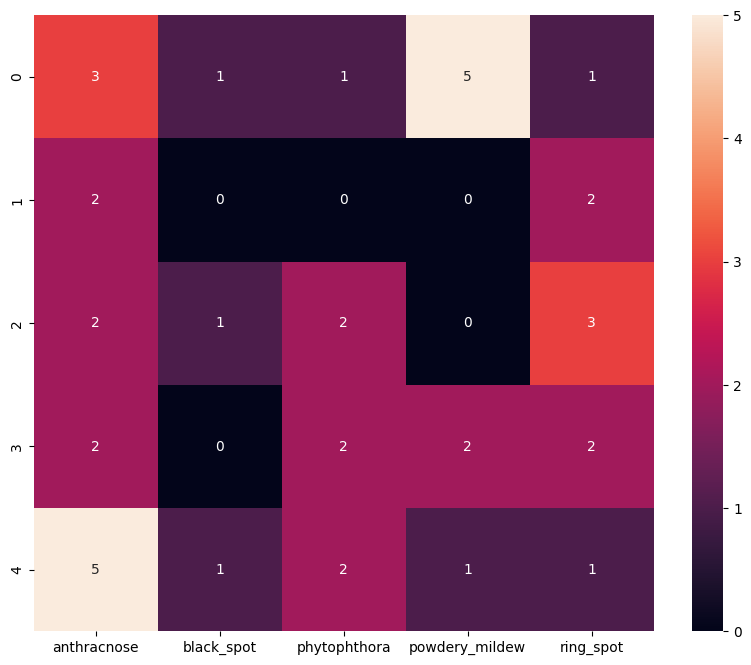

In [ ]:
import pandas as pd
import seaborn as sn

print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y) 
df = pd.DataFrame(cm, columns=test_set.class_indices)
plt.figure(figsize=(10,8)) 
sn.heatmap(df, annot=True)

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
# load best model
from keras.models import Model

from keras.models import load_model
model = load_model("/content/model_inception.h5")

In [ ]:
acc = model.evaluate_generator(test_set)[1]
print((f"The accuracy of your model is {acc*100} %"))

<ipython-input-84-5e904ebfe93d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_set)[1]


The accuracy of your model is 75.60975551605225 %


In [ ]:
from weakref import ref
import keras
from tensorflow.keras.utils import img_to_array

def predicition(path):
  img = load_img(path,target_size=(224,224))
  i=img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  pred =np.argmax(model.predict(img))
  print(f"the image belongd to { ref[pred]} ")

In [ ]:
from matplotlib import path
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions
path = "/content/drive/MyDrive/Papaya_Dataset/test/ring_spot/r42.jpg"

predicition(path)

1/1 [==============================] - 2s 2s/step
the image belongd to weakref.ReferenceType[3] 


In [ ]:
def predication(path):
  img = load_img(path,target_size=(224,224))
  i=img_to_array(img)
  im = preprocess_input(i)
  print(im.shape)

In [ ]:
def predication(path):
  img = load_img(path,target_size=(224,224))
  i=img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  print(pred)

In [ ]:
path = "/content/drive/MyDrive/Papaya_Dataset/test/phytophthora/p36.jpg"
predication(path)

1/1 [==============================] - 0s 270ms/step
3


In [ ]:
training_set.class_indices

{'anthracnose': 0,
 'black_spot': 1,
 'phytophthora': 2,
 'powdery_mildew': 3,
 'ring_spot': 4}